In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

from pathlib import Path
import os

In [2]:
%matplotlib notebook

In [3]:
in_path = 'data/pic/src/train/correct'
out_path = Path(in_path.replace('src','crop'))
in_path = Path(in_path)

out_path.mkdir(exist_ok=True, parents = True)

In [36]:
def crop_position(pos_dict):
    hor = pos_dict['hor']
    vert = pos_dict['vert']
    return min(hor), max(hor), min(vert), max(vert)

def save_im(im, pos_dict):
    x1, x2, y1, y2  = crop_position(pos_dict)
    plt.imsave('data/pic/crop/test.jpg',im[y1:y2, x1:x2])
    
def load_im(filepath):
    global im
    
    im = plt.imread(filepath)

def init(im):
    global height, width, mode, pos_dict
    
    height, width = im.shape[0:-1]
    pos_dict = {'hor': [], 'vert': []}
    mode = 0
    
    plt.clf()
    plt.imshow(im)
    

def draw_line(event):
    global pos_dict
    
    
    x, y = event.xdata, event.ydata 
    
    # adds a horizontal line and saves the hight at which it is inserted
    if mode == 0: 
        plt.hlines(y, 10, width - 10, 'r', zorder = 11, picker = 10)
        pos_dict['hor'].append(y)
        
    # adds a vertical line and saves the width at which it is inserted   
    if mode == 1: 
        plt.vlines(x, 10, height - 10, 'r', zorder = 12, picker = 10)
        pos_dict['vert'].append(x)

    plt.gcf().canvas.draw()
    
def change_mode(event):
    global mode, im, pos_dict, crop_poss, current_file
    
    # to add a horizontal line
    if event.key == 'h': 
        mode = 0
    # to add a vertical line
    elif event.key == 'v':
        mode = 1
    # switch between the modes
    elif event.key == 'm': 
        if mode == 0:
            mode = 1
        elif mode == 1:
            mode = 0
    # reset current picture
    elif event.key == 'r': 
        init(im)
    # save determined positions and move to next picture    
    elif event.key == 's': 
        crop_poss[current_file] = crop_position(pos_dict)
        current_file = next(iter_files)
        load_im(in_path / current_file)
        init(im)

In [37]:
files = [f for f in os.listdir(in_path)]
iter_files = iter(files)
crop_poss = {}

data/pic/src/train/correct/LED_correct_wood_4.JPG


<IPython.core.display.Javascript object>


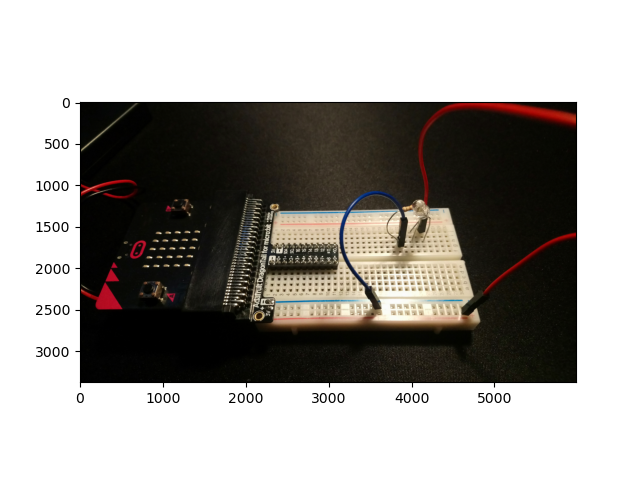

In [38]:
current_file =  next(iter_files)
filepath = in_path / current_file
print(filepath)
load_im(filepath)
init(im)
cid0 = plt.gcf().canvas.mpl_connect('button_press_event', draw_line)
cid1 = plt.gcf().canvas.mpl_connect('key_press_event', change_mode)

In [39]:
crop_poss

{'LED_correct_wood_4.JPG': (721.1321107925924,
  2784.1643688571075,
  1108.2289586221018,
  3943.3902489446828)}

LED_correct_wood_4.JPG (721.1321107925924, 2784.1643688571075, 1108.2289586221018, 3943.3902489446828)


<IPython.core.display.Javascript object>


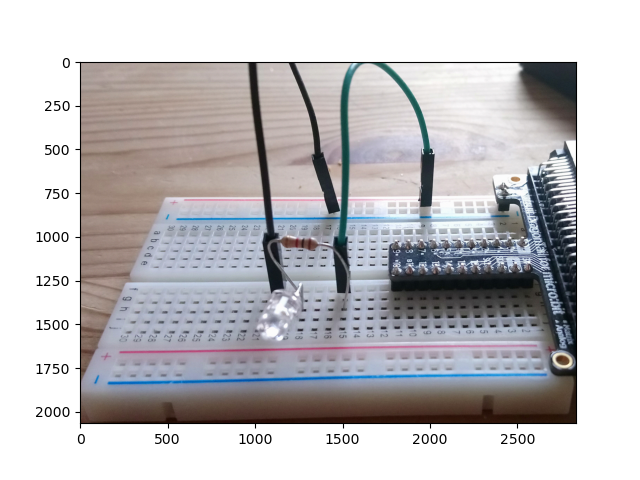

In [42]:
file = 'LED_correct_wood_4.JPG'
print(file, crop_poss[file])
im = plt.imread(in_path / file)
x1, x2, y1, y2 = crop_poss[file]
im_crop = im[int(x1): int(x2), int(y1): int(y2)]
plt.imshow(im_crop)